# Titanic ship dataset analysis
#### Author: Shubham Bhardwaj

## Introduction

The data set which we are analysing is of Titanic. Titanic was the largest and most luxurious ship of its time, unfortunetly it drowned on its first ride only. We will be analysing the data set of that ship to figure out some of the major questions coined after that incident.

Some of the major questions that comes to our mind are given below:
- [ ] Total number of passengers travelling ?  
- [ ] Total number of people survived, total death 
- [ ] Number of males and females travelling
- [ ] Number of males and females survived and dead 
- [ ] Number of passengers in 1st class, 2nd class and 3rd class
- [ ] Passengers survived in 1st, 2nd and 3rd class respectively
- [ ] Passengers on boarded from diff stations with their numbers and how many of them survived
- [ ] Number of people survived <10, 10-20, 20-40, 40-60, >60  
- [ ] Total fare 
- [ ] Number of people whose ages are missing
- [ ] Mean survivors and death
- [ ] Number of people survived from each station


## Load and check data

In [2]:
#Loading all the necessary libraries
import unicodecsv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualisation
import seaborn as sns #for visualisation
%matplotlib inline

In [3]:
#Reading data from Comma Separated Values files
#Creating the dataframe to get the clean structure of the data and its description, pandas will help us save time in this
titanic_df = pd.read_csv('/Users/shubhambhardwaj/Desktop/titanic-data.csv')

col_names=titanic_df.columns.tolist()
print("column names:")
print(col_names)

FileNotFoundError: [Errno 2] File b'/Users/shubhambhardwaj/Desktop/titanic-data.csv' does not exist: b'/Users/shubhambhardwaj/Desktop/titanic-data.csv'

In [3]:
print("Sample data:")
titanic_df.head(6)

Sample data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
#Dataframe Information
titanic_df.describe()
#From the description we can see that we have mean of all the columns, since we have mean of age also then we can replace the missing values of age with its mean value

/anaconda/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Dataframe datatype information
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Uniquness

PassengersID seems to be our primary key for this data that can be used to identify any record. Lets make this thought sure. Lets all the unique value in PassengerID and compare it with the unique values in passengerID if it happens so then we can say that all the values in PassengerID column is unique.

In [6]:
titanic_df['PassengerId'].count()

891

In [7]:
unique_PassengerId = titanic_df['PassengerId'].unique()
len(unique_PassengerId)

891

This makes us sure that our approach was right and PassengerID is a unique column with a unique values.

### Finding the missing values

Before moving further with our analysis we should make sure that there are no missing values in our data set, because taht can completely change the conclusion and prediction from our dataset.

In [8]:
#Method to find out missing records
def missingData(param):
    return titanic_df[(titanic_df[param].isnull())]['PassengerId'].count()
    
    
def finding_missing_record():
    missingPassengers = missingData('PassengerId') 
    missingSurvived = missingData('Survived')
    missingPclass = missingData('Pclass')
    missingName = missingData('Name')
    missingSex = missingData('Sex')
    missingAge = missingData('Age')
    missingSibSp = missingData('SibSp')
    missingParch = missingData('Parch')
    missingTicket = missingData('Ticket')
    missingFare = missingData('Fare')
    #missingCabin = missingData('Cabin')
    missingEmbarked = missingData('Embarked')
    missing_records=pd.Series([missingPassengers,missingSurvived,missingPclass,missingName,missingSex,missingAge,missingSibSp,missingParch,missingTicket,missingFare,missingEmbarked],index=['missingPassengers','missingSurvived','missingPclass','missingName','missingSex','missingAge','missingSibSp','missingParch','missingTicket','missingFare','missingEmbarked'])
    missing_records_df=pd.DataFrame(missing_records,columns=['No. of missing records'])
    return missing_records_df

In [9]:
#Finding the missing records

finding_missing_record()


,No. of missing records
missingPassengers,0
missingSurvived,0
missingPclass,0
missingName,0
missingSex,0
missingAge,177
missingSibSp,0
missingParch,0
missingTicket,0
missingFare,0


There seems to be a problem with our dataset we can see in the above results that there are many values which are missing in our data for Age, Embarked and Cabin. We will be neglecting cabin from our analysis as it won't be having much impact.

### Fixing the missing data

Out next challenge is to fix these errors we found out in our dataset. For fixing the data first of all we need to analyze it well. 

#### Analyzing the Age

Our approach will be to find out a suitable value for age that we an put in place of 0 and null, keeping in mind that it should not hamper our dataset.
Lets plot Ages on a graph and see if we can figure out something from that.

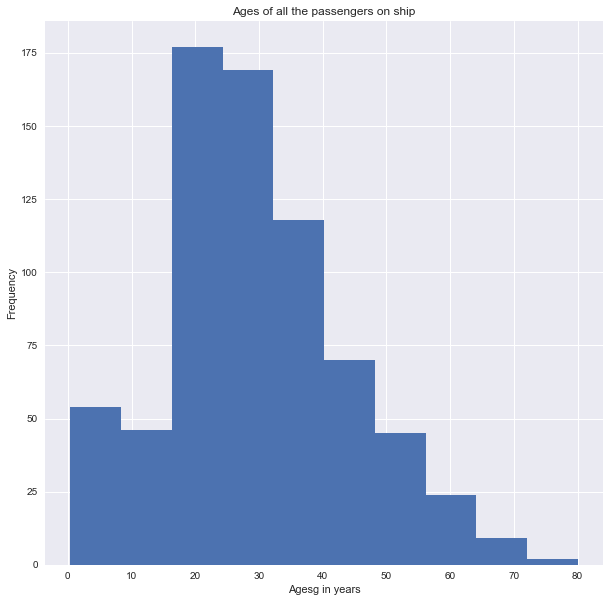

In [10]:
#This graph shows ages of passengers on ship
titanic_df['Age'].plot(kind="hist",title = "Ages of all the passengers on ship",figsize = (10,10)).set_xlabel("Agesg in years")

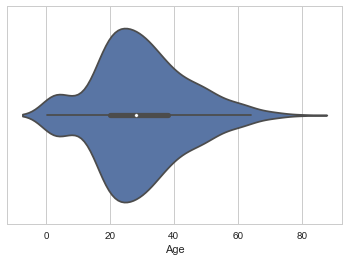

In [11]:
#This graph shows ages of passengers on ship
sns.set_style("whitegrid")
sns.violinplot(x=titanic_df["Age"])

We can see most of the ages is around 30 years and that is our mean also seen in the description of the data. Lets find out mean value of age in each class

In [12]:
titanic_df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

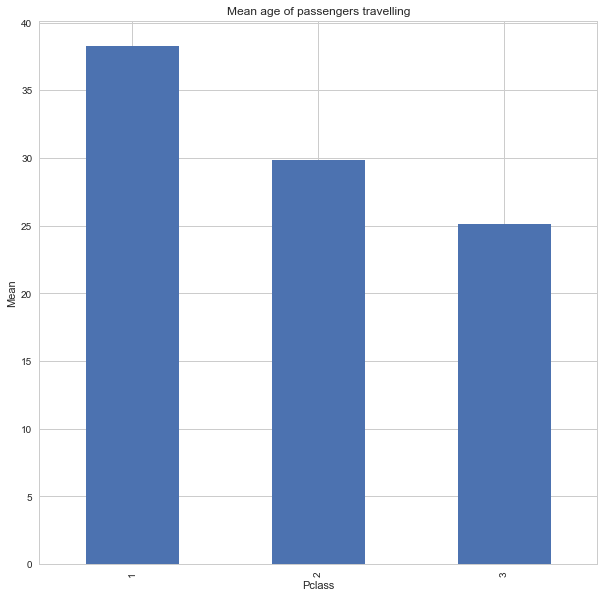

In [13]:
titanic_df.groupby('Pclass')['Age'].mean().plot(kind = 'bar', figsize=(10,10), title="Mean age of passengers travelling").set_ylabel("Mean")

To be more precise lets find out mean value of age of passengers survived and perished from each class 

In [14]:
titanic_df.groupby(['Pclass', 'Survived'])['Age'].mean()

Pclass  Survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: Age, dtype: float64

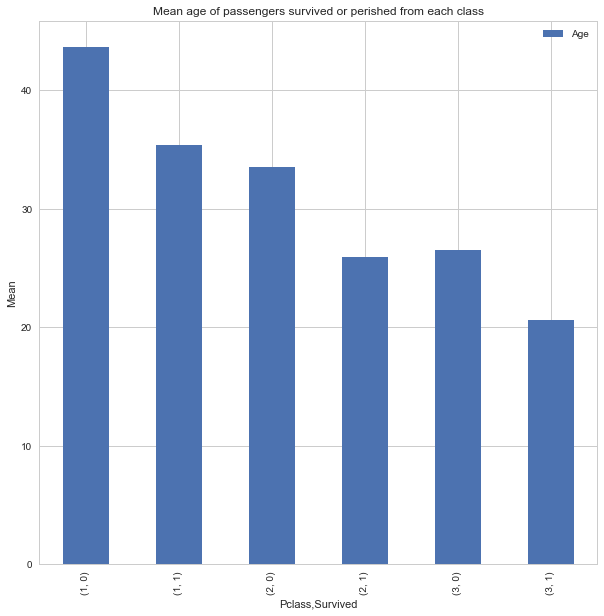

In [15]:
titanic_df.groupby(['Pclass', 'Survived'])['Age'].mean().plot(kind = 'bar', figsize=(10,10) , legend="True", title="Mean age of passengers survived or perished from each class").set_ylabel("Mean")

Therefore we will replace the null with mean value of pasenger survived or not and the class in which he/she was travelling.


In [16]:
#Method to replace values
def replace_all_null(grp, param):
    grp[param] = np.where(((grp[param] ==0) | (grp[param].isnull())), grp[param].mean(),grp[param])
    return grp


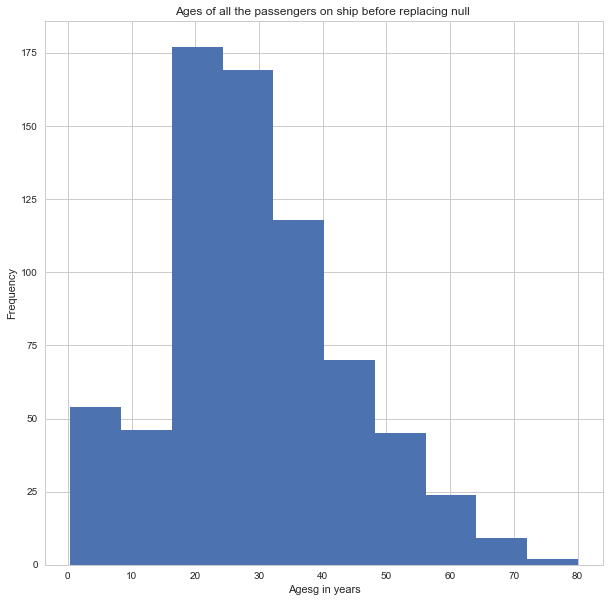

In [17]:
#This graph shows ages of passengers on ship
titanic_df['Age'].plot(kind="hist",title = "Ages of all the passengers on ship before replacing null ",figsize = (10,10)).set_xlabel("Agesg in years")

In [18]:
titanic_df = titanic_df.groupby(['Pclass','Survived']).apply(replace_all_null, "Age")

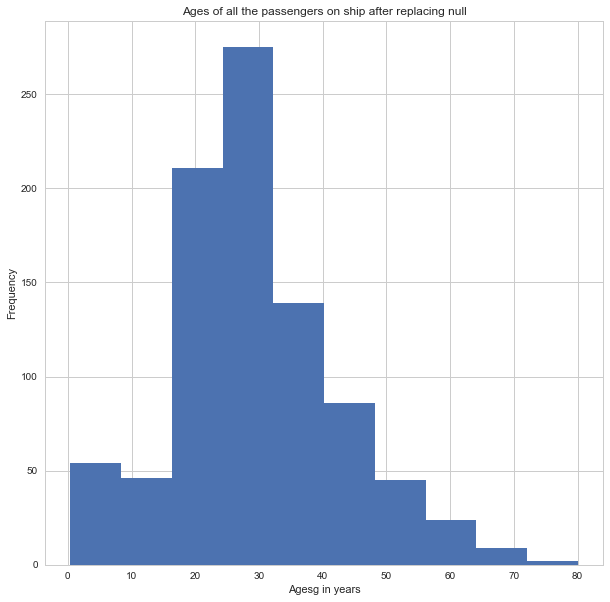

In [19]:
#This graph shows ages of passengers on ship after replacing nulls
titanic_df['Age'].plot(kind="hist",title = "Ages of all the passengers on ship after replacing null",figsize = (10,10)).set_xlabel("Agesg in years")

#### Lets do similar analysis for embarked as well

We will have a look at the price of their fare and their class and then we will decide from which station they would have boarded the ship.

First we should find out mean fare of each class from each station

In [20]:
titanic_df.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

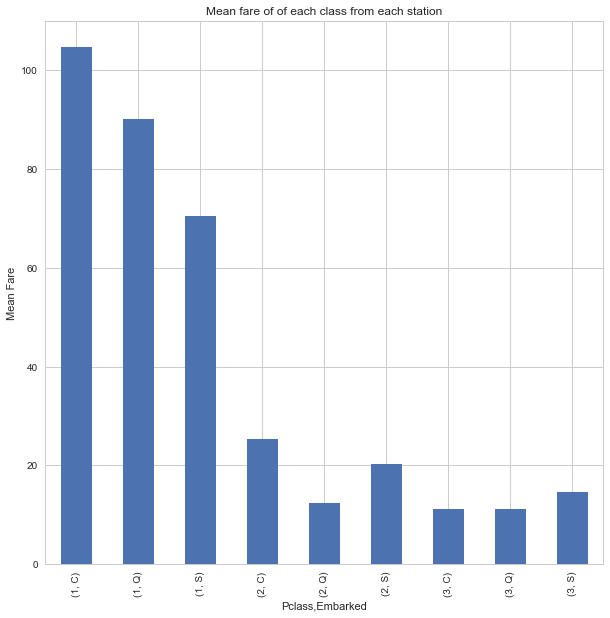

In [21]:
titanic_df.groupby(['Pclass', 'Embarked'])['Fare'].mean().plot(kind = 'bar', figsize=(10,10) , title="Mean fare of of each class from each station").set_ylabel("Mean Fare")

Now we will find out class and fare of each embarked missing record

In [22]:
titanic_df[(titanic_df['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


They both are from Pclass 1 and their fare is 80.0 that means they can be from Q and S 
Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
        
Before making our final decision lets find out all the records having Pclass as 1 , cabin is not null and fare is around 80

In [23]:
titanic_df[((titanic_df['Fare'] > 79.50 ) & (titanic_df['Fare'] < 80.50) & (titanic_df['Pclass'] == 1) & (titanic_df['Cabin'].notnull()))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN


We can see that our record is similar to these records therefore we can mark the missing station as S

In [24]:
titanic_df[(titanic_df['Embarked'].isnull())].fillna('S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [25]:
#Finding the missing records

finding_missing_record()

,No. of missing records
missingPassengers,0
missingSurvived,0
missingPclass,0
missingName,0
missingSex,0
missingAge,0
missingSibSp,0
missingParch,0
missingTicket,0
missingFare,0


### Improving the data types

The data types of few variables can be improved for example survived column can be of boolean type, it will be a clean presentation if 0 and 1 in survived column can be replaced with True and False respectively.

Similarly the Age, the age pf passengers is given in decimals. However, in real life scenario there is no point of representing age in decimals. So we will make it as integer value

In [26]:
#Dataframe datatype information
print "Data types before improvising"
titanic_df.dtypes

Data types before improvising


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
#changing the data types of columns Age and Survived
titanic_df['Survived'] = titanic_df['Survived'].astype(bool)
titanic_df['Age'] = titanic_df[('Age')].astype(int)


In [28]:
#Dataframe datatype information
print "After improving datatypes"
titanic_df.dtypes

After improving datatypes


PassengerId      int64
Survived          bool
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Finding the columns having zeros

There are few columns in our dataset that can't be zero, like PassengerID, Fare, Age, Ticket, Pclass. Here we are neglecting survived, SibSip, Parch column as they can be 0. Columns such as Name and Embarked has a possibilty of being null but cannot be 0 as they are of string type so we are neglecting them as well

In [29]:
#Method to find out records with value as 0
def zeroValueData(param):
    return titanic_df[(titanic_df[param] == 0)]['PassengerId'].count()
    
    
def zeroValueData_record():
    zeroValuePassengers = zeroValueData('PassengerId') 
    zeroValuePclass = zeroValueData('Pclass')
    zeroValueAge = zeroValueData('Age')
    zeroValueTicket = zeroValueData('Ticket')
    zeroValueFare = zeroValueData('Fare')
    zeroValue_records=pd.Series([zeroValuePassengers,zeroValuePclass,zeroValueAge,zeroValueTicket,zeroValueFare],index=['zeroValuePassengers','zeroValuePclass','zeroValueAge','zeroValueTicket','zeroValueFare'])
    zero_records_df=pd.DataFrame(zeroValue_records,columns=['No. of zero value records'])
    return zero_records_df

In [30]:
#Finding the 0 value records
zeroValueData_record()

,No. of zero value records
zeroValuePassengers,0
zeroValuePclass,0
zeroValueAge,7
zeroValueTicket,0
zeroValueFare,15


We can clearly see that there are 15 passengers having fare as 0 and 7 passengers with Age as 0. For age we can replace by the same technique we replaced the null. For fare we can replace the 0 with the mean fare of their Pclass

In [31]:
titanic_df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

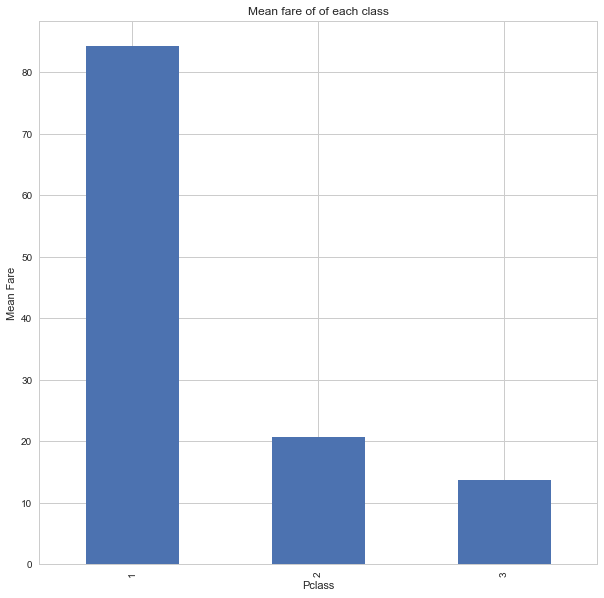

In [32]:
titanic_df.groupby(['Pclass'])['Fare'].mean().plot(kind = 'bar', figsize=(10,10) , title="Mean fare of of each class").set_ylabel("Mean Fare")

In [33]:
titanic_df = titanic_df.groupby(['Pclass']).apply(replace_all_null, "Fare")
titanic_df = titanic_df.groupby(['Pclass','Survived']).apply(replace_all_null, "Age")

In [34]:
#Finding the 0 value records
zeroValueData_record()

,No. of zero value records
zeroValuePassengers,0
zeroValuePclass,0
zeroValueAge,0
zeroValueTicket,0
zeroValueFare,0


Now our dataset is rid of null values and 0 values in its essentials columns. Now we can proceed with our exploration phase

### Exploration

In [35]:
#Again printing the sample data
print("Sample data:")
titanic_df.head(50)

Sample data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Given below are some of the quick question which can arise in our mind after having a look at the dataset

In [36]:
#Total number of passengers travelling
print ('Total number of passengers travelling = ',titanic_df['PassengerId'] .count())

#Total number of people srvived
print ('Total number of passengers survived = ',(titanic_df['Survived'] == 1).sum())

#Total number of casualities
print ('Total number of passengers died = ',(titanic_df['Survived'] == 0).sum())

#Mean of passengers srvived
print ('Mean of passengers srvived = ',(titanic_df['Survived'] == 1).mean())

#Mean of casualities
print ('Mean of passengers died = ',(titanic_df['Survived'] == 0).mean())

#Total number of females travelling
print ('Total number of females travelling', (titanic_df['Sex'] == 'female').sum())

#Total number of males travelling
print('Total number of males travelling', (titanic_df['Sex'] == 'male').sum())

#Total number of females survived
print ('Total number of females survived', ((titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)).sum())

#Total number of females died
print ('Total number of females died', ((titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 0)).sum())

#Total number of males survived
print ('Total number of males survived', ((titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 1)).sum())

#Total number of males died
print ('Total number of males died', ((titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 0)).sum())

('Total number of passengers travelling = ', 891)
('Total number of passengers survived = ', 342)
('Total number of passengers died = ', 549)
('Mean of passengers srvived = ', 0.38383838383838381)
('Mean of passengers died = ', 0.61616161616161613)
('Total number of females travelling', 314)
('Total number of males travelling', 577)
('Total number of females survived', 233)
('Total number of females died', 81)
('Total number of males survived', 109)
('Total number of males died', 468)


Lets see the number of survivors and casualities

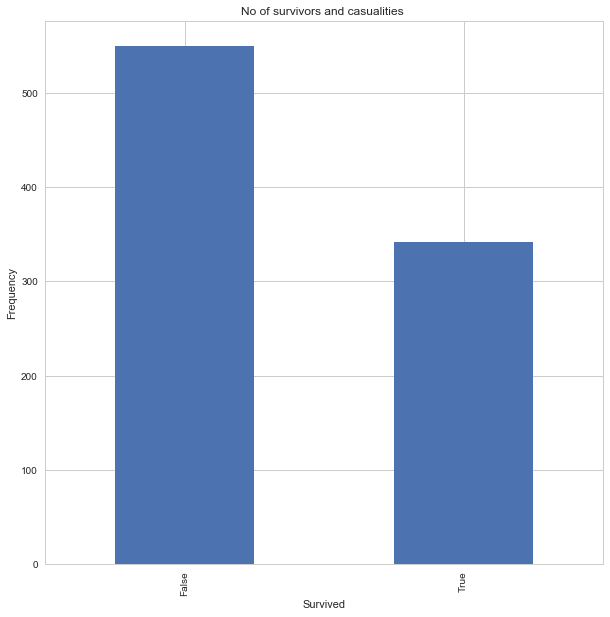

In [37]:
#This graph shows number of people survived and casualities
titanic_df.groupby(['Survived'])['PassengerId'].count().plot(kind="bar", figsize = (10,10), grid = 10 ,logy = 0, title = "No of survivors and casualities ").set_ylabel("Frequency")

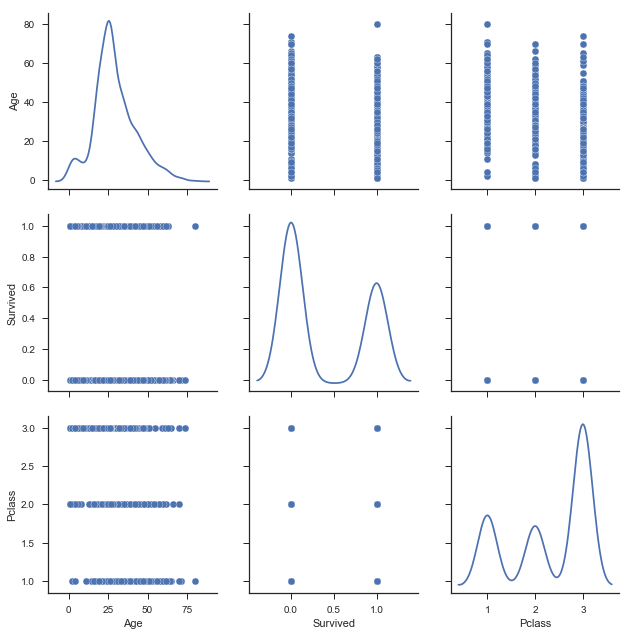

In [38]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic_df, vars=["Age", "Survived","Pclass"] , size =3, diag_kind="kde")

The below graph will represent the number of survivors based on sex

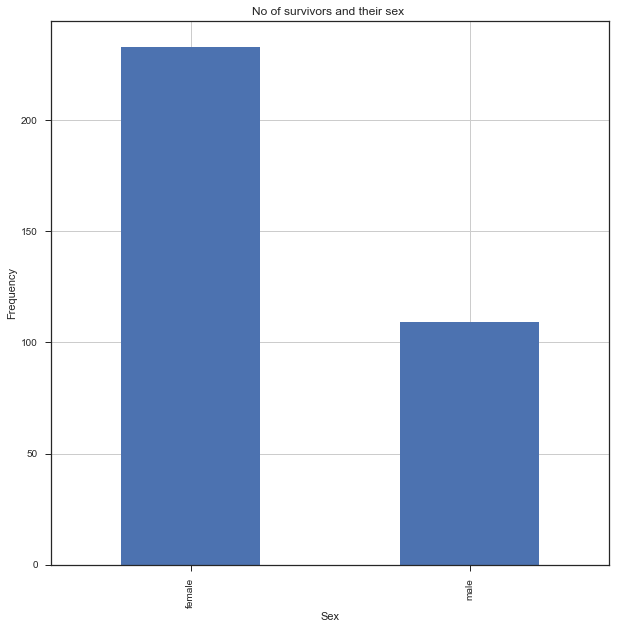

In [39]:
titanic_df.groupby('Sex')['Survived'].sum().plot(kind="bar" ,figsize = (10,10), grid = 10 ,logy = 0, title = "No of survivors and their sex ").set_ylabel("Frequency")

#### Lets find out people survived from each station 
Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

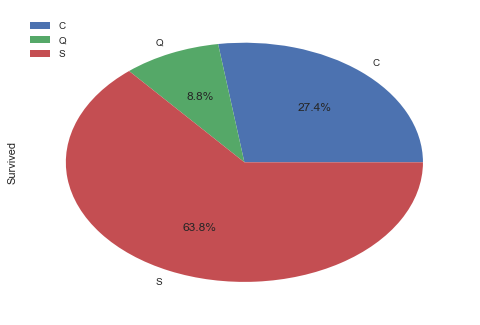

In [40]:
titanic_df.groupby('Embarked')['Survived'].sum().plot(kind="pie", autopct='%1.1f%%' , legend="True")

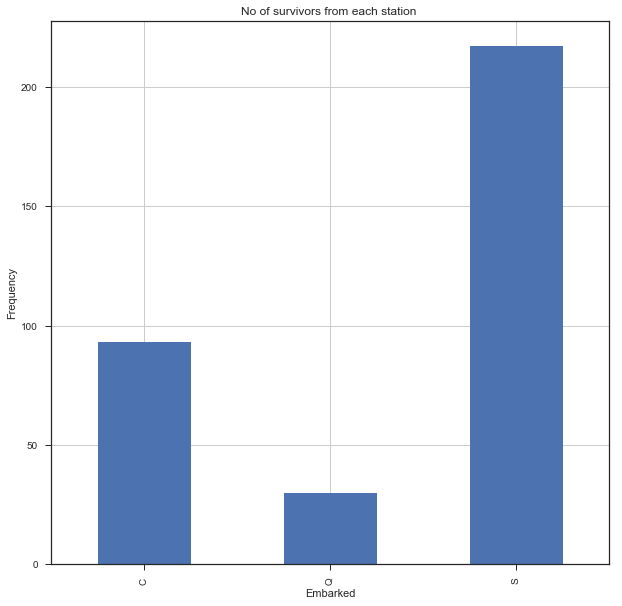

In [41]:
titanic_df.groupby('Embarked')['Survived'].sum().plot(kind="bar" ,figsize = (10,10), grid = 10 ,logy = 0, title = "No of survivors from each station ").set_ylabel("Frequency")

#### Lets find out number people survived from each class

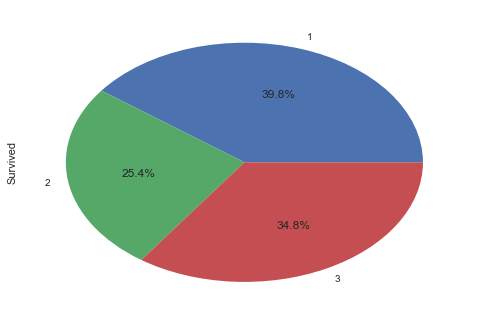

In [42]:
titanic_df.groupby('Pclass')['Survived'].sum().plot(kind="pie", autopct='%1.1f%%')

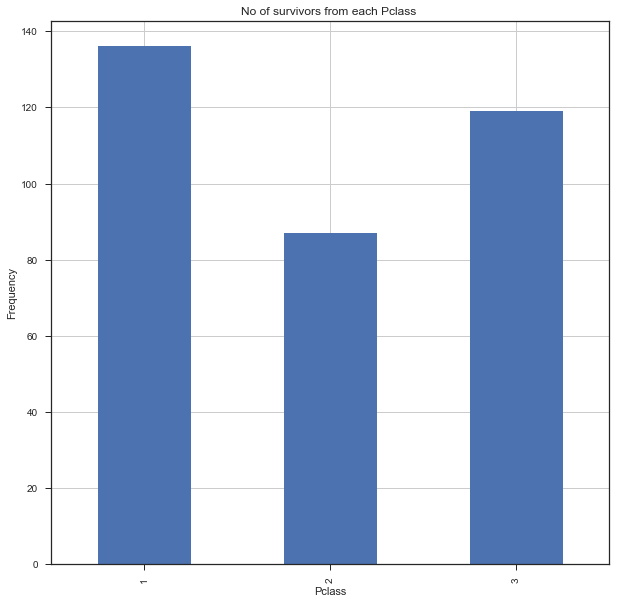

In [43]:
titanic_df.groupby('Pclass')['Survived'].sum().plot(kind="bar" ,figsize = (10,10), grid = 10 ,logy = 0, title = "No of survivors from each Pclass ").set_ylabel("Frequency")

#### Comparing the survival rates for different age groups

Survived
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

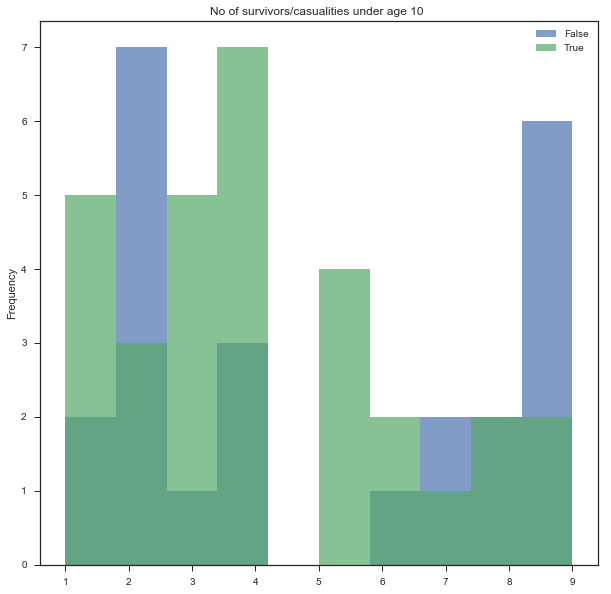

In [44]:
titanic_df[(titanic_df['Age'] < 10)].groupby('Survived')['Age'].plot(kind="hist", alpha =0.7,legend = "True", figsize = (10,10),title = "No of survivors/casualities under age 10 ")

Survived
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

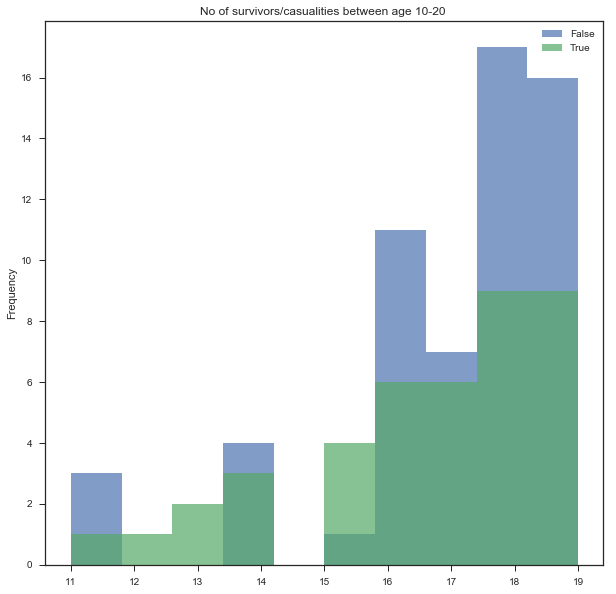

In [45]:
titanic_df[(titanic_df['Age'] > 10) & (titanic_df['Age'] < 20)].groupby('Survived')['Age'].plot(kind="hist",figsize = (10,10), legend="True",alpha=0.7,title = "No of survivors/casualities between age 10-20 ")

Survived
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

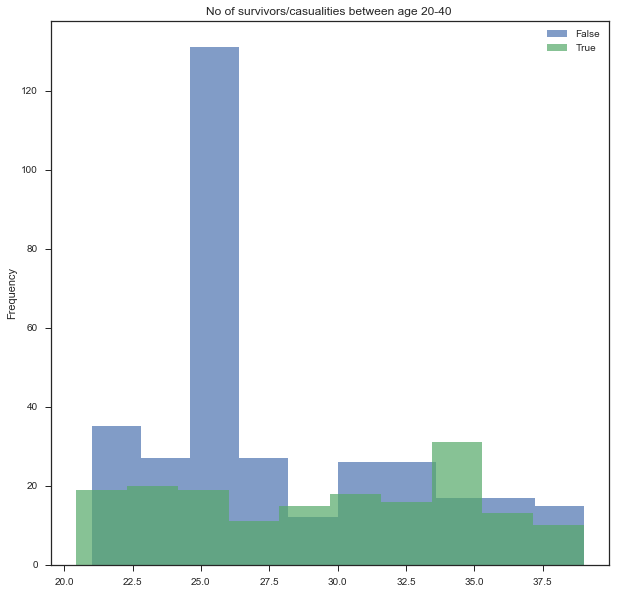

In [46]:
titanic_df[(titanic_df['Age'] > 20) & (titanic_df['Age'] < 40)].groupby('Survived')['Age'].plot(kind="hist",figsize = (10,10), legend="True",alpha=0.7,title = "No of survivors/casualities between age 20-40 ")

Survived
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

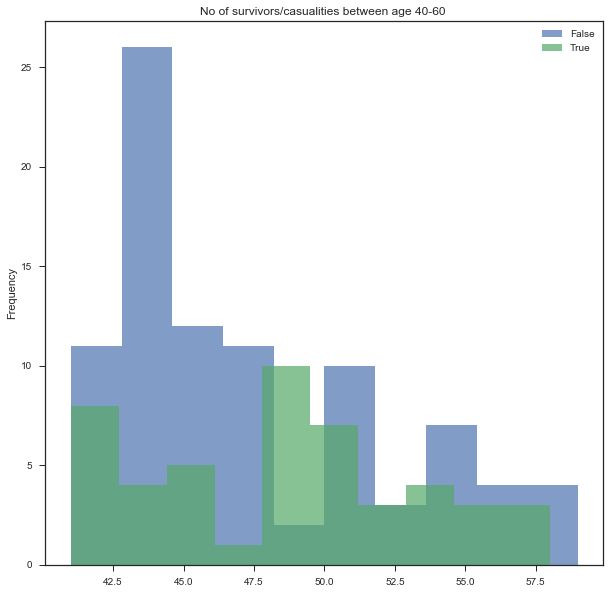

In [47]:
titanic_df[(titanic_df['Age'] > 40) & (titanic_df['Age'] < 60)].groupby('Survived')['Age'].plot(kind="hist",alpha=0.7,figsize = (10,10), legend="True",title = "No of survivors/casualities between age 40-60 ")

Survived
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

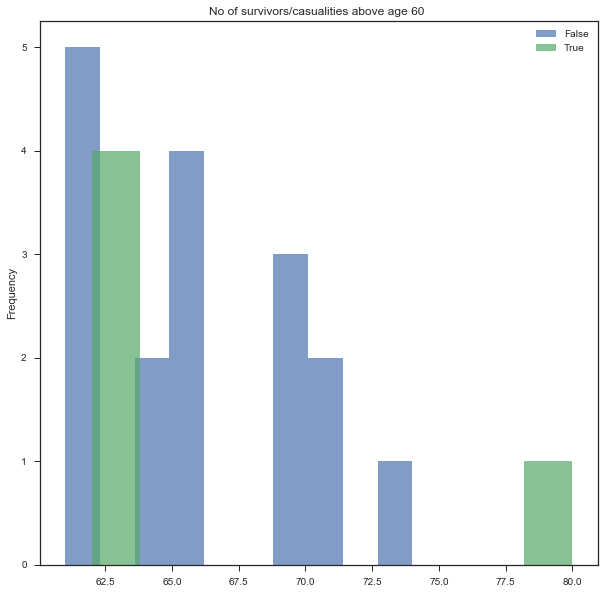

In [48]:
titanic_df[(titanic_df['Age'] > 60) ].groupby('Survived')['Age'].plot(kind="hist", alpha=0.7,legend="True",figsize = (10,10),use_index="True",title = "No of survivors/casualities above age 60 ")

As we are aware that after crash of any ship its mandatory to firt children, women and old people should abandon the ship.
We will investigate that was that really happene or priority to the first class passengers were given.
From the below we see that there were more of the females who survived

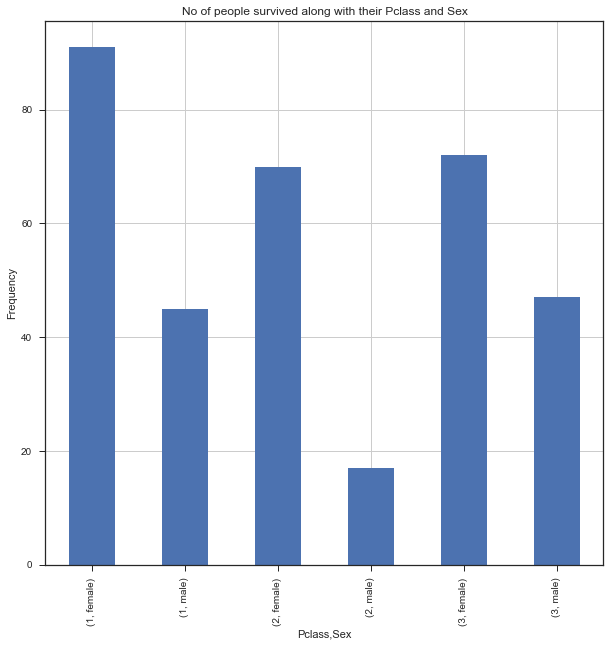

In [49]:
#This graph shows that 
titanic_df.groupby(['Pclass','Sex'])['Survived'].sum().plot(kind="bar", figsize = (10,10), grid = 10 ,logy = 0, title = "No of people survived along with their Pclass and Sex").set_ylabel("Frequency")

## Statistical Infrences

### Null Hypothesis
We will investigate statistically to see if the mean age of the people who survived is different from the mean age of people who were not able to survive.

Since we don't have population standard deviation therefore we will proceed with t-test. 

Our null hypothesis will be -
H0 : Mean of Survivor = Mean of not survivors
HA : Mean of Survivor <> Mean of not survivors

Therefore, this will be a bi-directional test and our confidence interval will be of 95%( alpha = .05)

In [50]:
# Fetching the data for survivors and casualities
survivor = titanic_df[(titanic_df['Survived'] == 1)]['Age']

casualities = titanic_df[(titanic_df['Survived'] == 0)]['Age']

In [51]:
# Giving the description of surivors
survivor.describe()

count    342.000000
mean      28.240183
std       13.543162
min        1.000000
25%       20.000000
50%       27.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
# Giving the description of casualities
casualities.describe()

count    549.000000
mean      30.142077
std       12.774355
min        1.000000
25%       23.000000
50%       26.000000
75%       37.000000
max       74.000000
Name: Age, dtype: float64

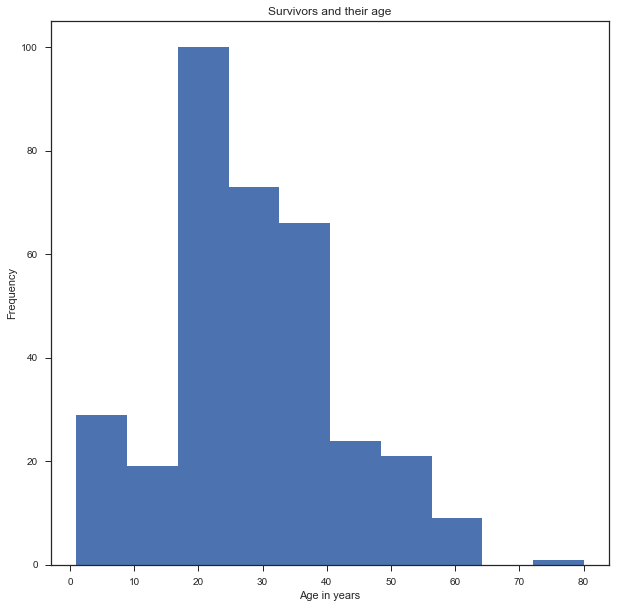

In [53]:
survivor.plot(kind="hist" , figsize=(10,10), title = "Survivors and their age").set_xlabel("Age in years")

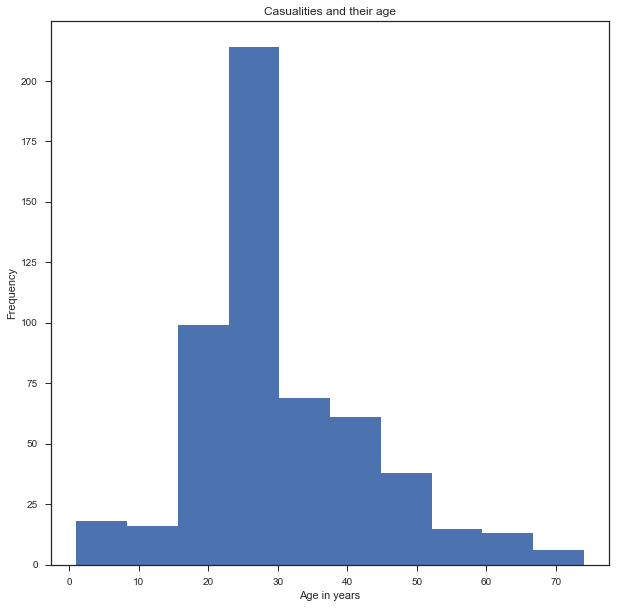

In [54]:
casualities.plot(kind="hist" , figsize=(10,10), title = "Casualities and their age").set_xlabel("Age in years")

### Calculating Standard error

Below is the code to calculate SE 

In [55]:
SE = np.sqrt((survivor.var()/survivor.count())+(casualities.var()/casualities.count()))
SE

0.91298774951725681

### T statictic

In [56]:
T = (survivor.mean() - casualities.mean() )/SE
T

-2.0831538888098922

In [57]:
DegreeOfFreedom = survivor.count() + casualities.count() - 2
DegreeOfFreedom

889

As per t-table we have calculated that our t-critical value is +/- 1.646
and our p-value will be 0.1406 

#### Since our tstatistic is with the range of t-critical vaules hence we can say that we fail to reject the null

### Conclusion

After all the analysis we can say that-
Our null hypothesis was accepted that means the mean no. of passengers who survived is equal to the mean number of passengers who perished.

From our analysis few more points were cleared like there were most of the people travelling in 1st class, most of the pasengers were from S station and most of them were from age group 20-30.

We also found that more females were survived as compared to men. 

However, while analyzing I found one strange fact the number of people survived from 1st class were more in number than those from other classes.
From this we can say that there was a priority given to 1st class people.

#### Biasness in our data set and limitation
The data set we got was higly incorrect and we can believe that many of the records were wrongly entered. This limits our analysis to some extent.

